In [1]:
import os
import attiicc as ac
import matplotlib.pyplot as plt
from attiicc.utils import grid_detection

### Load weights and build segmenter
weights = '/home/ecdyer/PROJECTS/nanowell_processing/weights/sam_vit_h_4b8939.pth'
sam = ac.SamSegmenter(weights)

CUDA is available.
Number of CUDA devices: 1
Model Loaded


y_min:  0 y_max:  130
avg_y:  30
y_min:  130 y_max:  260
row_centroids:  [149 149 149 149 149 150 149 150 150]
avg_y:  149.33333333333334
y_min:  260 y_max:  390
row_centroids:  [269 270 270 270 270 270 271 270 271]
avg_y:  270.1111111111111
y_min:  390 y_max:  520
row_centroids:  [390 390 390 390 390 390 390 391 391 510 509 510 511 511 511 511 511 511]
avg_y:  450.3888888888889
y_min:  520 y_max:  650
row_centroids:  [630 631 630 631 630 631 631 631 631]
avg_y:  630.6666666666666
y_min:  650 y_max:  780
row_centroids:  [751 751 751 751 751 751 750 751 752]
avg_y:  751.0
y_min:  780 y_max:  910
row_centroids:  [871 872 871 872 871 872 872 872 872]
avg_y:  871.6666666666666
y_min:  910 y_max:  1042
row_centroids:  [990 990 991 991 991 991 991 990 990 991 990 990 990 990]
avg_y:  990.4285714285714
avg_y_dist:  120.66666666666663
Removing edge well: (46, 149)
Removing edge well: (115, 28)
Removing edge well: (122, 996)
Removing edge well: (254, 27)
Removing edge well: (261, 995)
Removing 

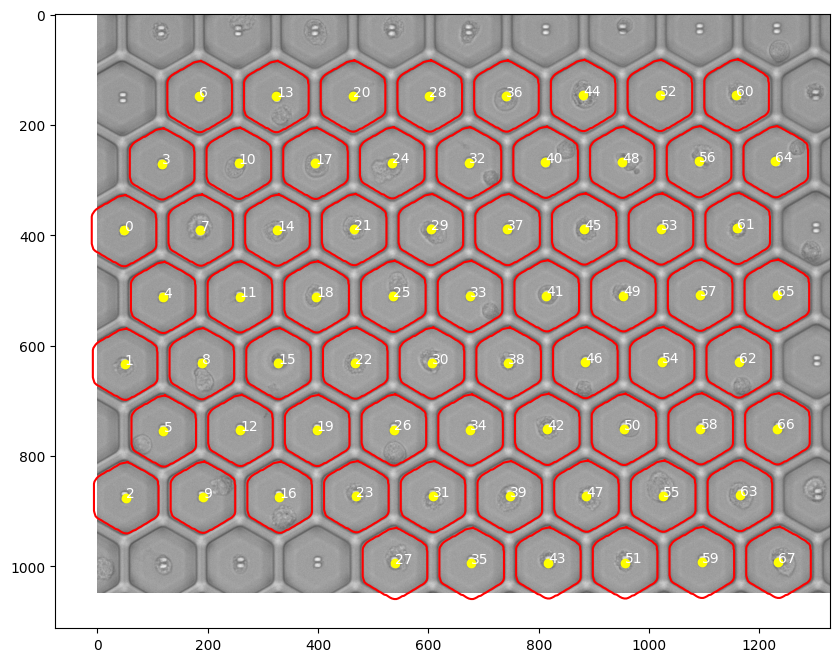

In [2]:
# Use a reference image for learning the well plate grid.
img = '/home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/smaller_test_data/f00d3/scan_Top Slide_R_p00_0_A01f00d3.TIF'

# Segment the image.
segmentation = sam.segment(img)

# Find the well plate regions.
# Each region will have its own shape and centroid
# as detected by SAM.
rough_plate = segmentation.find_wells()

# Build the well plate grid.
# This auto-detects the average well plate shape
# and creates a grid of regions
# using this average shape.
plate = rough_plate.build_grid()

# Remove edge wells.
plate.remove_edge_wells()

# Plot the results.
plate.plot()

In [3]:
# Save the grid definition.
grid_definition = plate.grid_definition
grid_definition.save('/home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/v2_test_nanowell.npz')

# Load the grid definition later,
# allowing you to skip the previous steps.
grid_definition = ac.GridDefinition.load('/home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/v2_test_nanowell.npz')

Removing edge well: (32, 137)
Removing edge well: (34, 379)
Removing edge well: (35, 621)
Removing edge well: (37, 863)
Removing edge well: (100, 16)
Removing edge well: (239, 15)
Removing edge well: (378, 15)
Removing edge well: (517, 14)
Removing edge well: (656, 14)
Removing edge well: (795, 14)
Removing edge well: (934, 13)
Removing edge well: (1073, 13)
Removing edge well: (1212, 12)
Removing edge well: (1283, 133)
Removing edge well: (1285, 375)
Removing edge well: (1286, 617)
Removing edge well: (1288, 859)
Removed 17 edge wells.


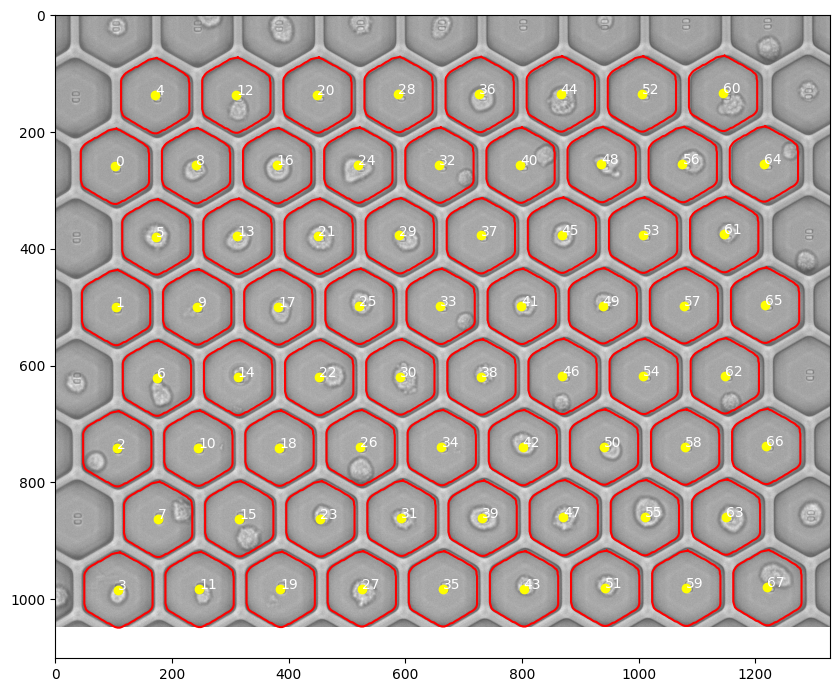

In [4]:
# Load a new image and segment it.
new_img = '/home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/smaller_test_data/f00d3/scan_Top Slide_R_p01_0_A01f00d3.TIF'
new_segmentation = sam.segment(new_img)

# Find the well plate regions.
new_plate = new_segmentation.find_wells()

# Build the well plate grid using the same grid definition.
new_plate = new_plate.apply_grid(grid_definition)

# Remove edge wells.
new_plate.remove_edge_wells()

# Plot the results.
new_plate.plot()

### Batch of Images 😬

Removing edge well: (32, 137)
Removing edge well: (34, 379)
Removing edge well: (35, 621)
Removing edge well: (37, 863)
Removing edge well: (100, 16)
Removing edge well: (239, 15)
Removing edge well: (378, 15)
Removing edge well: (517, 14)
Removing edge well: (656, 14)
Removing edge well: (795, 14)
Removing edge well: (934, 13)
Removing edge well: (1073, 13)
Removing edge well: (1212, 12)
Removing edge well: (1283, 133)
Removing edge well: (1285, 375)
Removing edge well: (1286, 617)
Removing edge well: (1288, 859)
Removed 17 edge wells.


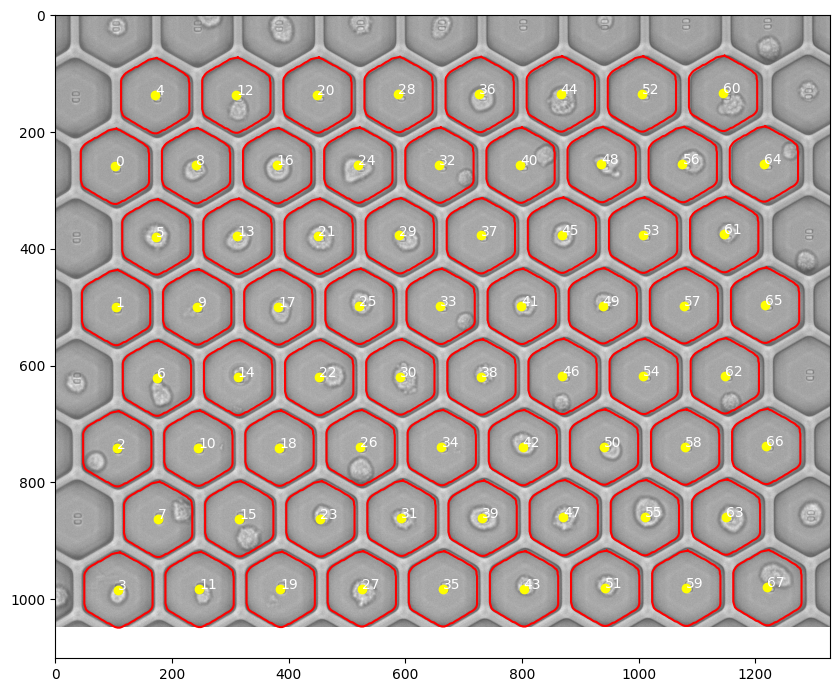

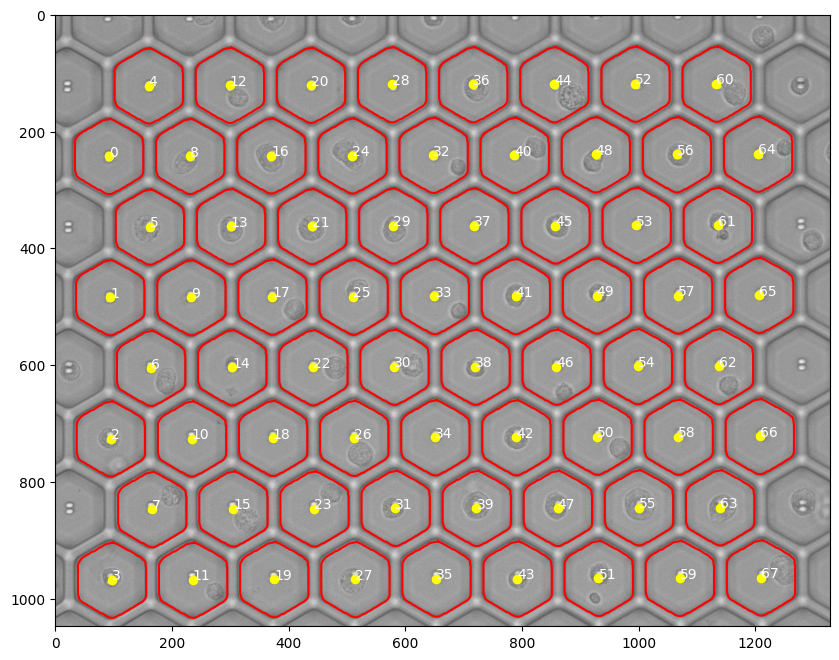

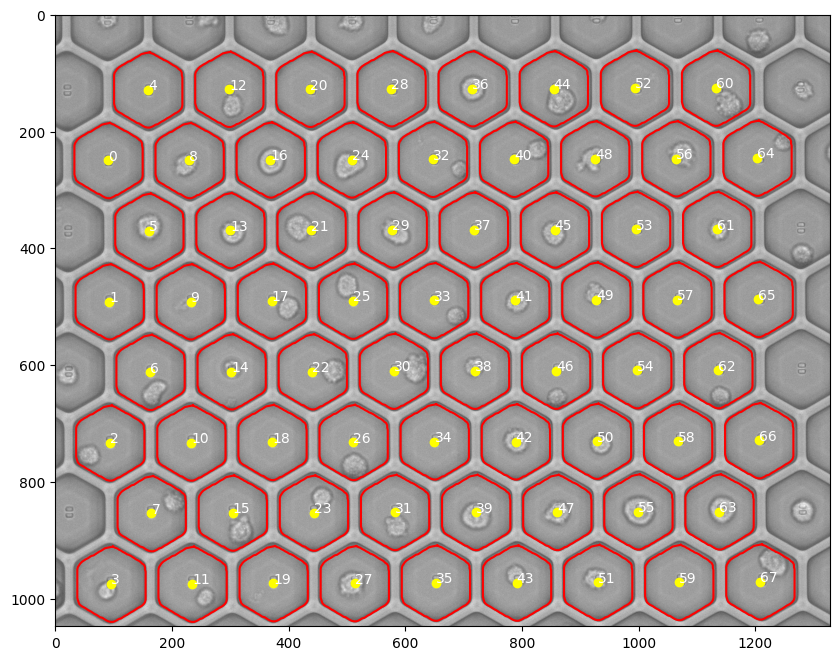

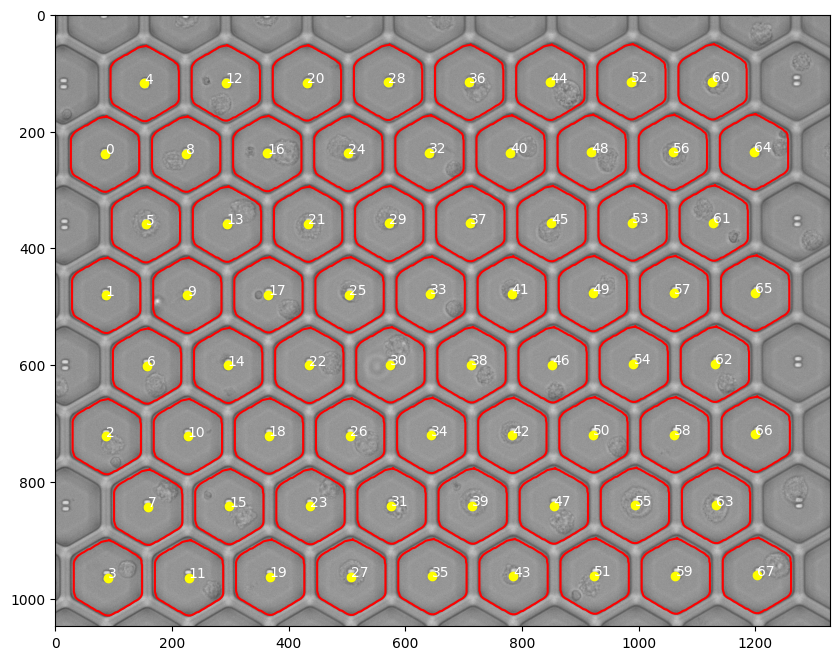

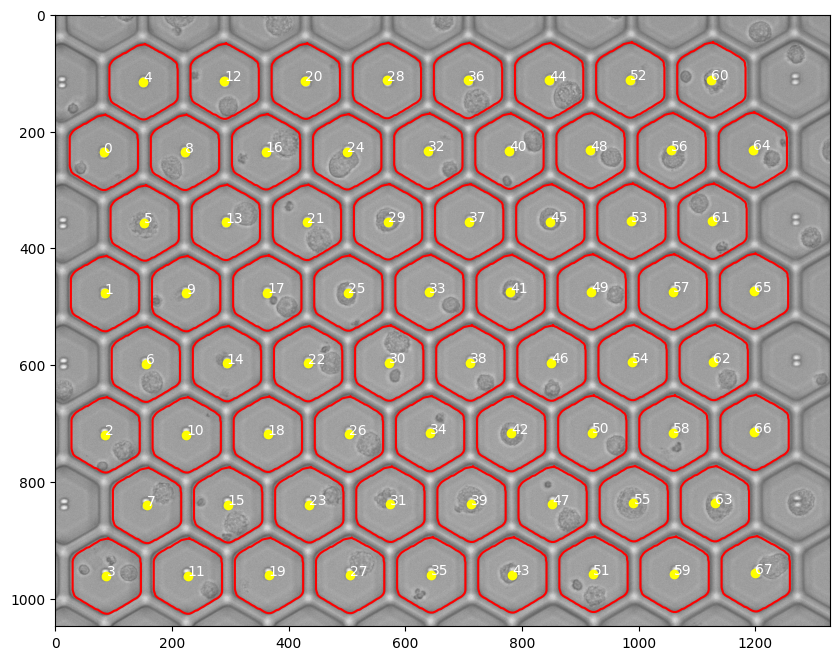

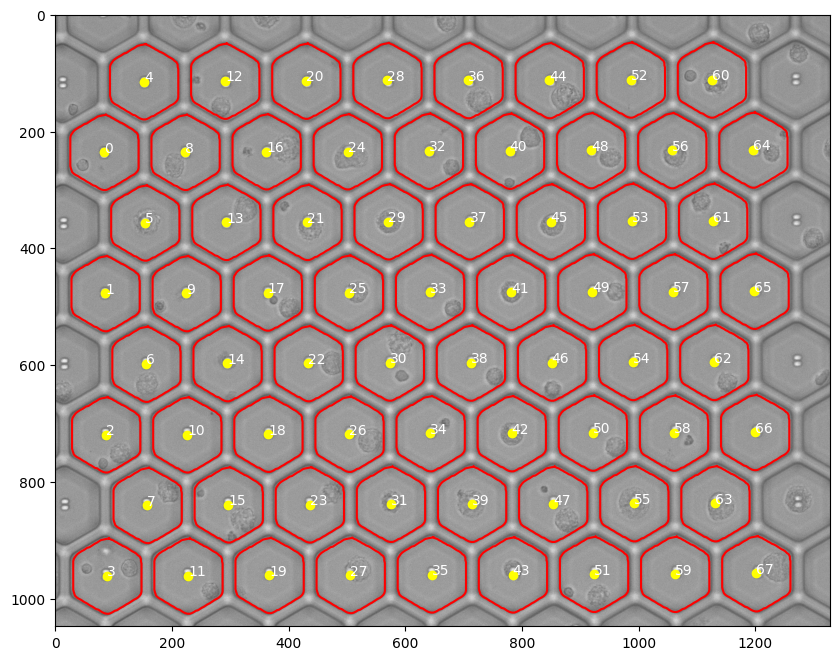

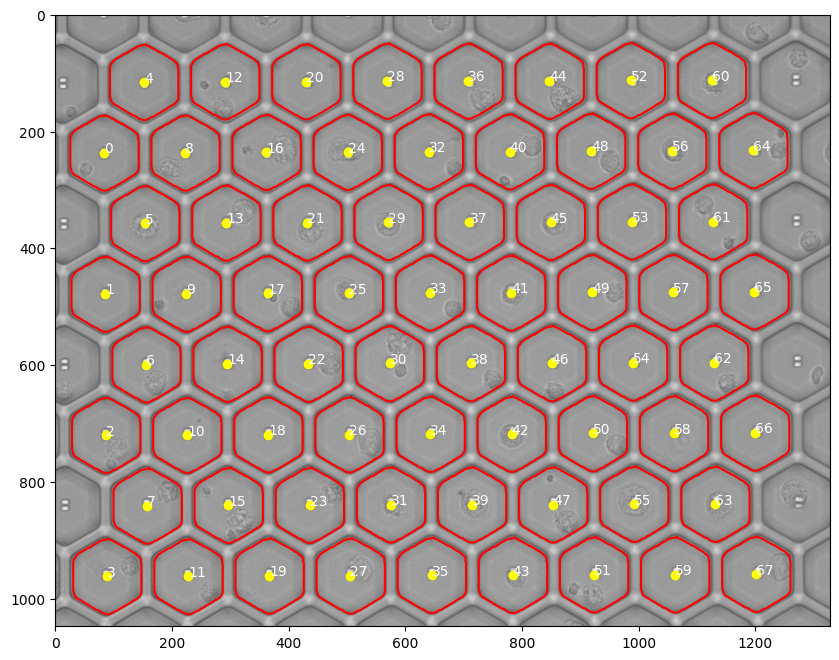

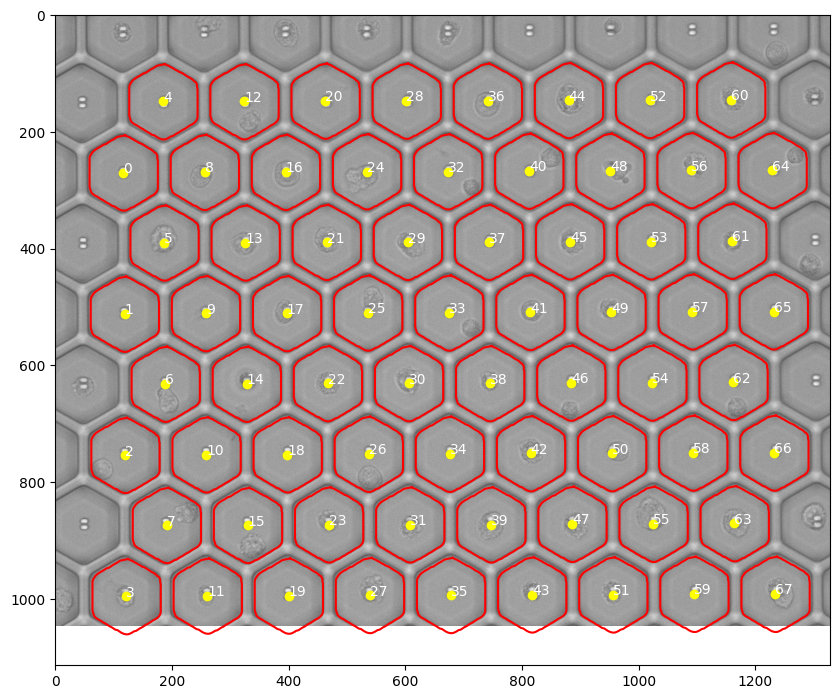

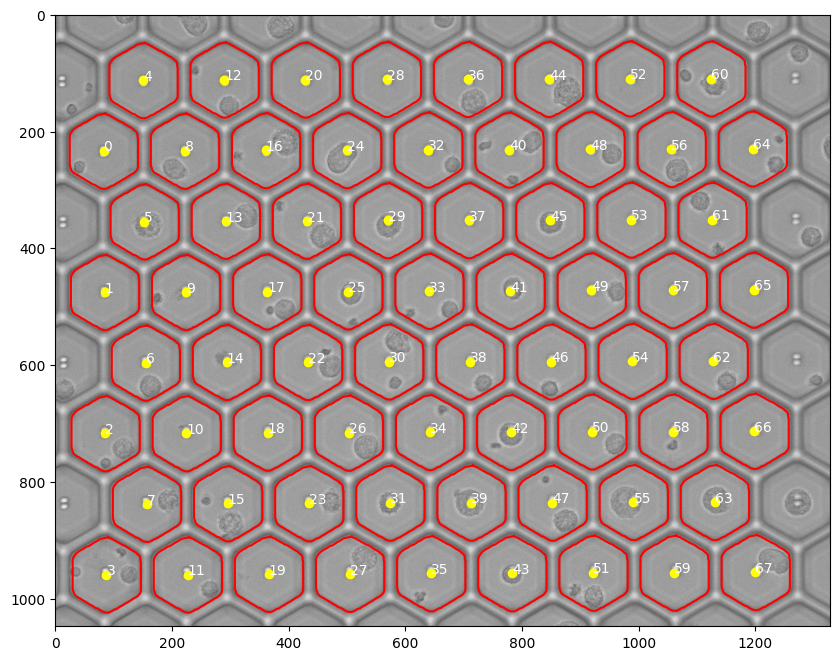

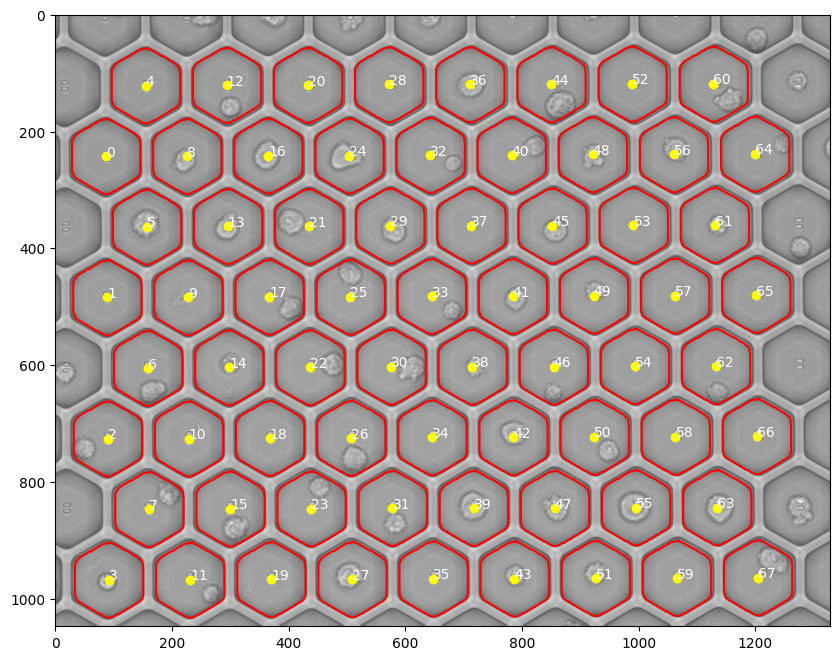

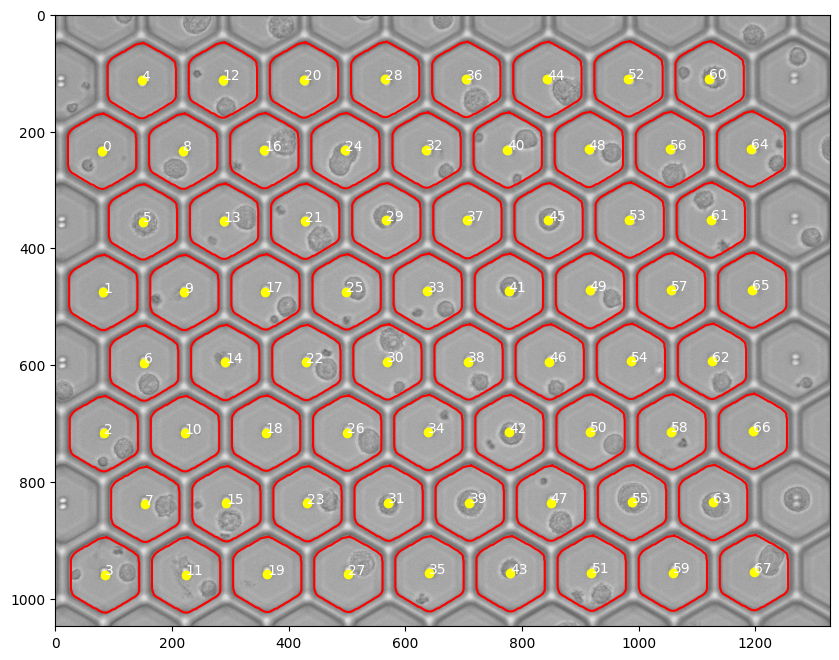

In [6]:
img_dir = '/home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/smaller_test_data/f00d3'
imgs = os.listdir(img_dir)
img_list = [img_dir + '/' + img for img in imgs]


plates = sam.build_plates(img_list, grid_definition)

plates[0].remove_edge_wells()

stack = ac.PlateStack(*plates)

for p in plates:
    p.plot()

In [7]:
field_id = 'f00d3'
stack.save_all_wells(f'/home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/{field_id}_stack')

Saving image (well: 0, time: 0, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_0.png
Saving image (well: 0, time: 1, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_1.png
Saving image (well: 0, time: 2, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_2.png
Saving image (well: 0, time: 3, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_3.png
Saving image (well: 0, time: 4, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_4.png
Saving image (well: 0, time: 5, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_5.png
Saving image (well: 0, time: 6, dim: (118, 130)) to /home/ecdyer/PROJECTS/nanowell_processing/exp1b_PDL1/stacks/f00d3_stack/well_0_time_6.png
Saving